In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from  tensorflow import keras
from  tensorflow.keras import layers




In [5]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='' ,untar=True)

'/tmp\\.keras\\datasets\\flower_photos'

In [6]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='',untar=True)

In [7]:
data_dir

'/tmp\\.keras\\datasets\\flower_photos'

In [8]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('/tmp/.keras/datasets/flower_photos')

In [9]:
image_count=len(list(data_dir.glob('"/".jpg')))
image_count

0

In [10]:
roses=list(data_dir.glob('roses/*'))

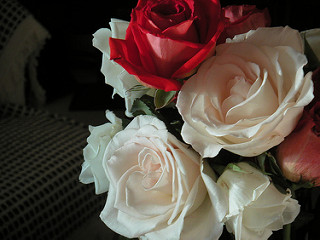

In [11]:
PIL.Image.open(str(roses[1]))

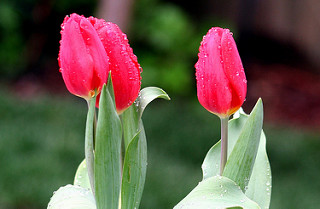

In [12]:
tulips=list(data_dir.glob('tulips/*'))

PIL.Image.open(str(tulips[0]))

In [13]:
flower_image={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandolion':list(data_dir.glob('dandolion/*')),
    'sunflowers':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [14]:
flower_image['daisy']

[WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/104

In [15]:
flower_labels={
    'roses':0,
    'daisy':1,
    'dandolion':2,
    'sunflowers':3,
    'tulips':4
    
}

In [16]:
import cv2
img=cv2.imread(str(flower_image['roses'][0]))
img.shape

(240, 179, 3)

In [17]:
X, y = [], []

for flower_name, images in flower_image.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels[flower_name])

In [18]:
flower_image['dandolion']

[]

In [20]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [21]:
X=np.array(X)
y=np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [30]:
len(x_train)

1554

In [31]:
len(x_test)

519

In [32]:
x_train=x_train/255
x_test=x_test/255

In [34]:
model=keras.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [35]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
49/49 [==============================] - 46s 901ms/step - loss: 1.0109 - accuracy: 0.5026
Epoch 2/5
49/49 [==============================] - 45s 923ms/step - loss: 0.7476 - accuracy: 0.6634
Epoch 3/5
49/49 [==============================] - 47s 958ms/step - loss: 0.6158 - accuracy: 0.7342
Epoch 4/5
49/49 [==============================] - 48s 974ms/step - loss: 0.4836 - accuracy: 0.8082
Epoch 5/5
49/49 [==============================] - 45s 924ms/step - loss: 0.3580 - accuracy: 0.8552


In [36]:
model.evaluate(x_test,y_test)

17/17 [==============================] - 6s 317ms/step - loss: 0.8880 - accuracy: 0.6281


[0.8879931569099426, 0.6281310319900513]

In [37]:
pred=model.predict(x_test)


17/17 [==============================] - 6s 350ms/step


In [41]:
score=tf.nn.softmax(pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.371407e-03, 1.764283e-02, 9.931971e-10, 4.116829e-09,
       9.749858e-01], dtype=float32)>

In [42]:
np.argmax(score)

4

In [43]:
y_test[0]

4

In [53]:
data_Aug=keras.Sequential(
    [layers.experimental.preprocessing.RandomContrast(0.4)]
)

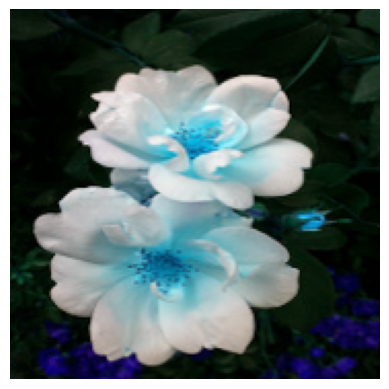

In [55]:
plt.axis('off')
plt.imshow(X[0])

In [58]:
model=keras.Sequential([
    data_Aug,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [59]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
49/49 [==============================] - 43s 823ms/step - loss: 1.0149 - accuracy: 0.5161
Epoch 2/5
49/49 [==============================] - 41s 841ms/step - loss: 0.7751 - accuracy: 0.6416
Epoch 3/5
49/49 [==============================] - 44s 892ms/step - loss: 0.7382 - accuracy: 0.6673
Epoch 4/5
49/49 [==============================] - 39s 802ms/step - loss: 0.6525 - accuracy: 0.7181
Epoch 5/5
49/49 [==============================] - 40s 822ms/step - loss: 0.5739 - accuracy: 0.7587


In [60]:
model.evaluate(x_test,y_test)

17/17 [==============================] - 5s 263ms/step - loss: 0.8303 - accuracy: 0.6416


[0.8303083181381226, 0.6416184902191162]